## Introduction
This project will dive into the topic of **inflation**. In this project I will try to answer the questions of what it is, and how it is calculated. In addition to the more generic description we will also discover the implications it has on the economy, and what tools are used in order to mitigate it. The scope of the project will be limited to looking at Canada with focus on main events such as the Global Financial Crisis and COVID-19 as well as the impact of oil prices.

Inflation is defined as the rate of increase in prices over a given amount of time and thus explains the decline in purchasing power for a given currency.[[1]](https://www.imf.org/external/pubs/ft/fandd/basics/30-inflation.htm#:~:text=Inflation%20is%20the%20rate%20of,of%20living%20in%20a%20country) It is a broad measure to capture trends in prices and can be used to measure the increase or decrease in cost of living in a country. Inflation is a hot topic at the moment given the aftermath of the COVID-19 crisis and has been further emphasized after Russia's invasion of Ukraine.

Governments and their central banks have set targets for inflation and often aim to achieve a steady inflation of 2% and use different measures to reach this goal
, with the most common one being the central bank's policy interest rate. In short, inflation is a consequence of when the supply of money is greater than the demand for it. The central bank can thus – in theory – control the supply by increasing or decreasing the policy interest rate.

#### How is it calculated
Inflation is calculated by analyzing the change of prices in the CPI (Consumer Price Index). The CPI is a set basket of goods and services that is segmented into eight categories: Food; Shelter; Household operations, furnishings and equipment; Clothing and footwear; Transportation; Health and personal care; Recreation, education and reading, and Alcoholic beverages, tobacco products and recreational cannabis.[[2]](https://www.statcan.gc.ca/en/subjects-start/prices_and_price_indexes/consumer_price_indexes/faq) By calculating the price change between two periods, one finds the inflation rate by calculating the percentage change between the two time periods. Inflation is most often looked at on a yearly level and will be the base for this project. To calculate inflation as accurate as possible, the weights in the CPI are renewed every few years to have an updated basket that best describes peoples purchase behaviors.

In [176]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import matplotlib.ticker as mtick
import plotly.graph_objects as go
import plotly.express as px
import pycountry

In [69]:
inflation = pd.read_csv('1810000401-eng.csv',delimiter='\t') # Load the inflation dataset from Statistics Canada
inflation=inflation.set_index('Products and product groups') # Change the index to the product groups making up the consumer Consumer Price Index
inflation.columns =  pd.to_datetime(inflation.columns, format='%b-%y') # Change the columns to datetime objects
inflation_pct = inflation.pct_change(fill_method = None,axis=1,periods=12)*100 # Create a new dataset with the percentage change on a yearly basis

In [70]:
cpi = pd.read_csv('1810000701-noSymbol.csv') # Load the consumer price index weights dataset from Statistics Canada
cpi=cpi.set_index('Products and product groups') # Change the index to the product groups making up the consumer Consumer Price Index
cpi.columns =  pd.to_datetime(cpi.columns, format='%Y') # Change the columns to datetime objects
cpi = cpi.transpose()
cpi['All-items excluding energy'] = pd.to_numeric(cpi['All-items excluding energy'])
cpi['Energy'] = pd.to_numeric(cpi['Energy'])
cpi['Goods'] = pd.to_numeric(cpi['Goods'])
cpi['Services'] = pd.to_numeric(cpi['Services'])



#### Takeaways from looking at inflation curves and movement.
Seen in the graph below we are experiencing the highest level of inflation during the 21st century. By looking at the different segments we are able to derive that the biggest influence comes from the rapidly increasing energy prices with oil being the most significant contributor. Ever since March of last year the energy prices has been increasing by over 20 percent since the same period the year before. The problematic aspect of increasing energy prices, with oil being the driving factor, is that monetary policy is not as efficient. The energy market is a very complicated machinery as it involves many more parts, especially with oil - given its global presence in addition to the OPEC cartel. Although the CPI has shifted towards a composition where energy is becoming a smaller portion due to lower energy usage, we still see how it is the largest single contributor to the increasing inflation due to the highly volatile movement of it with price changes not matched by any other category. However, it should be noted that when looking at the cumulative categories, that do not include energy, they are also rapidly increasing at the moment and actions to brake the increase in inflation should be taken to mitigate these. Apart from the rapidly increasing energy prices, shelter has become more expensive lately and the housing market has reached yet another peak. With shelter making up 30% of the CPI, it has a great impact on the overall inflation.

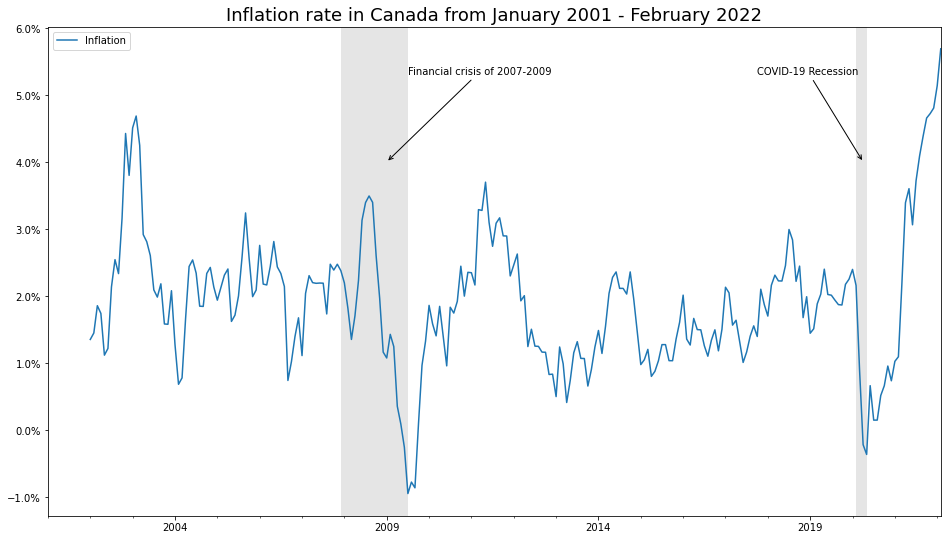

In [71]:
fig, ax = plt.subplots(figsize=(16,9))
inflation_pct.loc['All-items'].plot(label='Inflation')
plt.legend(loc='upper left', fontsize=10)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.axvspan("2007-12-01", "2009-07-01", color='grey', alpha=0.2, lw=0)
ax.annotate("Financial crisis of 2007-2009", xy=("2009-01-01", 4), xytext=("2009-07-01", 5.3),
            arrowprops=dict(arrowstyle="->"))
plt.axvspan("2020-02-20", "2020-05-01", color='grey', alpha=0.2, lw=0)
ax.annotate("COVID-19 Recession", xy=("2020-04-20", 4), xytext=("2017-10-20", 5.3),
            arrowprops=dict(arrowstyle="->"))
plt.title('Inflation rate in Canada from January 2001 - February 2022',fontsize = 18)
plt.show()


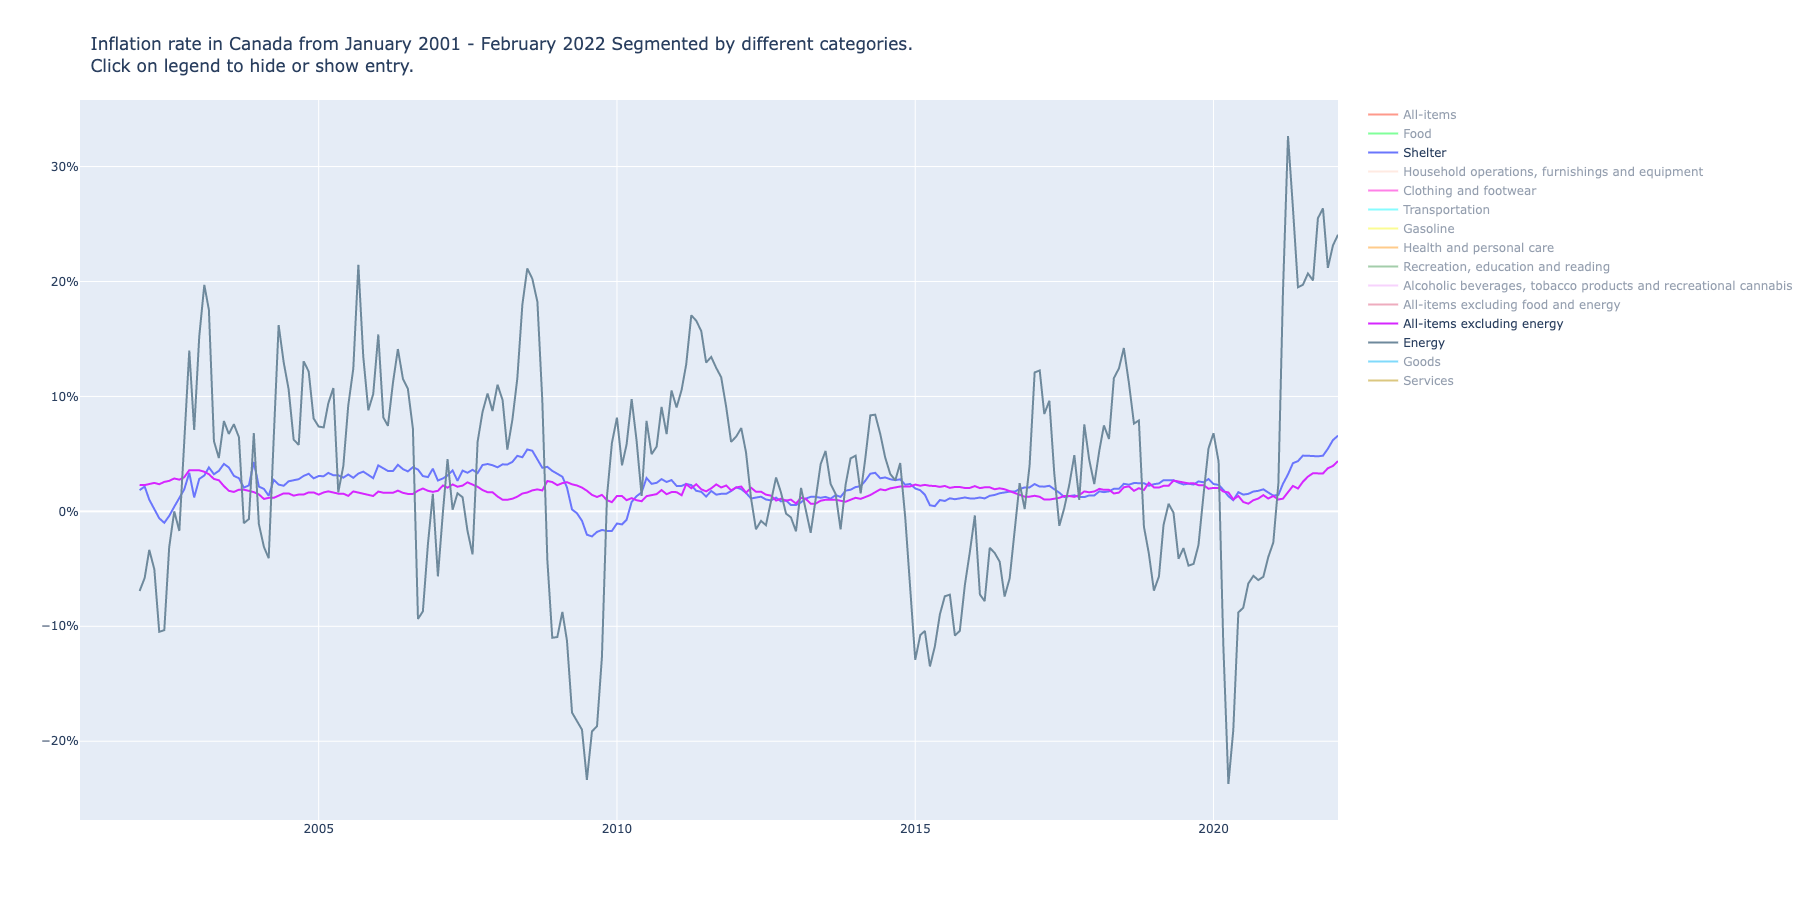

In [72]:

colors = px.colors.qualitative.Light24

fig = go.Figure()
i =0
for index in inflation_pct.index:
    if index not in['All-items excluding energy','Energy','Shelter']:
        fig.add_traces(go.Scatter(x=inflation_pct.columns, y = inflation_pct.loc[index]/100, mode = 'lines',name=index,visible='legendonly',marker=dict(color = colors[i])))
    else:
        fig.add_traces(go.Scatter(x=inflation_pct.columns, y = inflation_pct.loc[index]/100, mode = 'lines',name=index,marker=dict(color = colors[i])))
    i+=1
fig.update_layout(
    autosize=False,
    width=1400,
    height=900,title=f'Inflation rate in Canada from January 2001 - February 2022\nSegmented by different categories.<br>Click on legend to hide or show entry.')
fig.update_layout(yaxis_tickformat = '.00%')

fig.show()


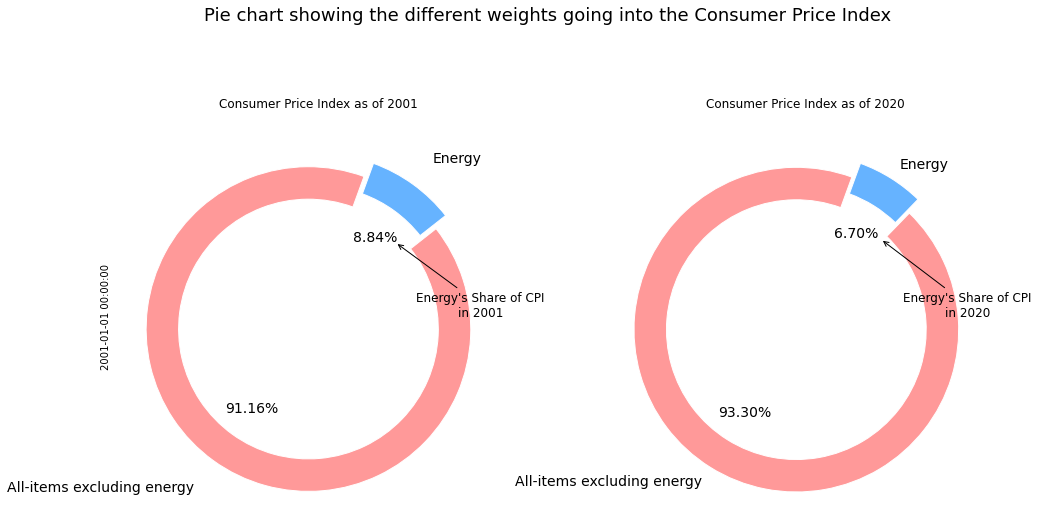

In [73]:
fig,axes = plt.subplots(1,2,figsize=(16,9))
colors = ['#ff9999','#66b3ff','#99ff99']
cpi.loc["2001-01-01"][-4:-2].plot.pie(title='Consumer Price Index as of 2001',autopct='%.2f%%',colors=colors,explode=[0.1,0.],fontsize=14,startangle=70,ax=axes[0],wedgeprops=dict(width=0.2, edgecolor='w'),labeldistance=1.2)
cpi.loc["2020-01-01"][-4:-2].plot.pie(title='Consumer Price Index as of 2020',autopct='%.2f%%',colors=colors,explode=[0.1,0.],fontsize=14,startangle=70,ax=axes[1],wedgeprops=dict(width=0.2, edgecolor='w'))
plt.ylabel("")
plt.suptitle("Pie chart showing the different weights going into the Consumer Price Index",fontsize=18)
axes[0].annotate("Energy's Share of CPI\nin 2001", xy=(0.48, 0.45), xytext=(1, 0),
            arrowprops=dict(arrowstyle="->"),ha='center',fontsize=12)
axes[1].annotate("Energy's Share of CPI\nin 2020", xy=(0.47, 0.47), xytext=(1, 0),
            arrowprops=dict(arrowstyle="->"),ha='center',fontsize=12)
plt.show()

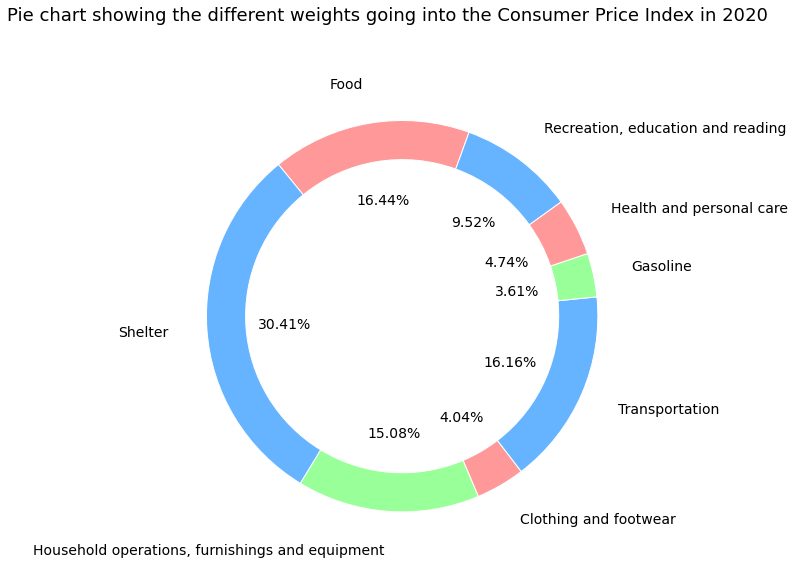

In [74]:
fig,ax = plt.subplots(figsize=(16,9))
#colors = ['#ff9999','#66b3ff','#99ff99']
cpi.loc["2020-01-01"][1:9].plot.pie(autopct='%.2f%%',colors=colors,fontsize=14,startangle=70,ax=ax,wedgeprops=dict(width=0.2, edgecolor='w'),labeldistance=1.2)

plt.ylabel("")
plt.suptitle("Pie chart showing the different weights going into the Consumer Price Index in 2020",fontsize=18)

plt.show()

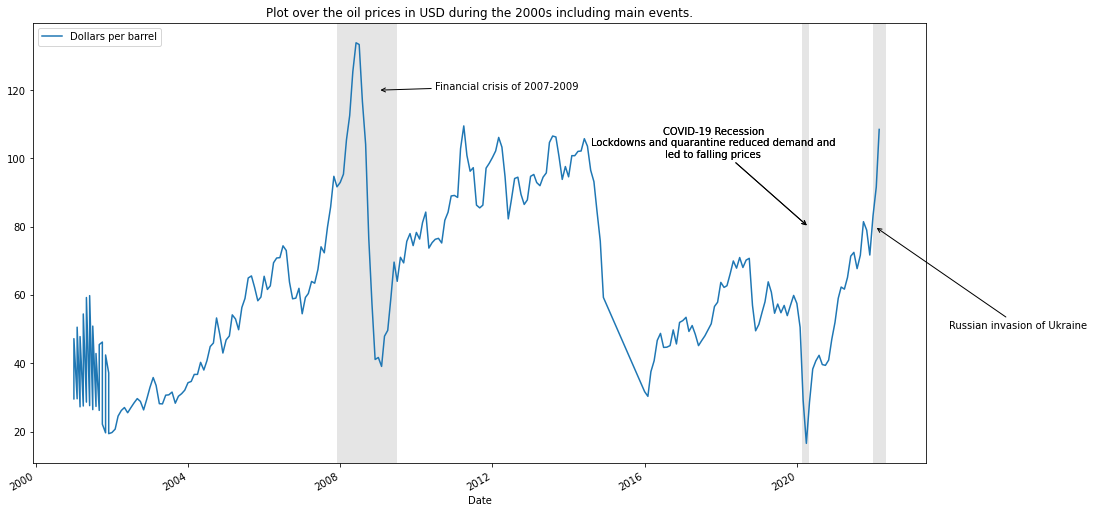

In [75]:
fig, ax = plt.subplots(figsize=(16,9))
oil = pd.read_csv('Oil_prices.csv')

oil['Date']=pd.to_datetime(oil['Date'])
oil.plot(x='Date',y='Cushing, OK WTI Spot Price FOB (Dollars per Barrel)',ax=ax,label='Dollars per barrel')
low = list(oil['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].loc[oil.idxmin()])[1]
high = oil['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].loc[oil.loc[oil['Date']>"2020-01-01"].idxmax()[0]]
plt.axvspan("2007-12-01", "2009-07-01", color='grey', alpha=0.2, lw=0)
ax.annotate("Financial crisis of 2007-2009", xy=("2009-01-01", 120), xytext=("2010-07-01", 120.3),
            arrowprops=dict(arrowstyle="->"))
plt.axvspan("2020-02-20", "2020-05-01", color='grey', alpha=0.2, lw=0)
ax.annotate("COVID-19 Recession\nLockdowns and quarantine reduced demand and\nled to falling prices", xy=("2020-04-20", 80), xytext=("2017-10-20", 100.3),
            arrowprops=dict(arrowstyle="->"),ha='center')
plt.axvspan("2022-01-01", "2022-05-01", color='grey', alpha=0.2, lw=0)
ax.annotate("COVID-19 Recession\nLockdowns and quarantine reduced demand and\nled to falling prices", xy=("2020-04-20", 80), xytext=("2017-10-20", 100.3),
            arrowprops=dict(arrowstyle="->"),ha='center')
ax.annotate("Russian invasion of Ukraine", xy=("2022-01-20", 80), xytext=("2025-10-20", 50.3),
            arrowprops=dict(arrowstyle="->"),ha='center')
plt.title('Plot over the oil prices in USD during the 2000s including main events.')
plt.show()



### This part of the project will investigate the measures that the government is taking in order to either boost inflation or to limit it.
In the graph below the inflation rate and Canada's policy interest rate are plotted together. As earlier mentioned, the use of monetary policy is a known way that government use to combat inflation. It becomes clear in the graph that the curves follow each other and that the policy interest rate is increased or decreased for its desired behavior. In the graph two events close in time are highlighted. Firstly, after the Financial crisis that started in December 2007 the market took a heavy downturn and as a result investments and spending was low. In order to get the economy back on track and to boost spending by making it cheaper to loan money; the interest rate was decreased from 4.5% to 0.25% from between December of 2007 and April of 2009. The policy interest rate has since then stayed at a historical low, however, with the rapidly increasing inflation, measures have been taken quickly and the policy interest rate has been increased by 0.75 percentage points.

In [76]:
interest_rate = pd.read_csv('BankofCanadaRateHistory.csv') # Load dataset for the policy interest rate
interest_rate = interest_rate.set_index('Date')
interest_rate.index =  pd.to_datetime(interest_rate.index, format='%Y-%m-%d') # Change the columns to datetime objects


In [77]:

mask = (interest_rate.index > "2007-10-01")& (interest_rate.index < "2009-12-01")
interest_rate.loc[mask].head()


,Bank of Canada Target Overnight Rate
Date,
2007-11-01,4.50
2007-12-01,4.50
2007-12-01,4.25
2008-01-01,4.25
2008-01-01,4.00


In [78]:
interest_rate.loc[mask].tail()

,Bank of Canada Target Overnight Rate
Date,
2009-07-01,0.25
2009-08-01,0.25
2009-09-01,0.25
2009-10-01,0.25
2009-11-01,0.25


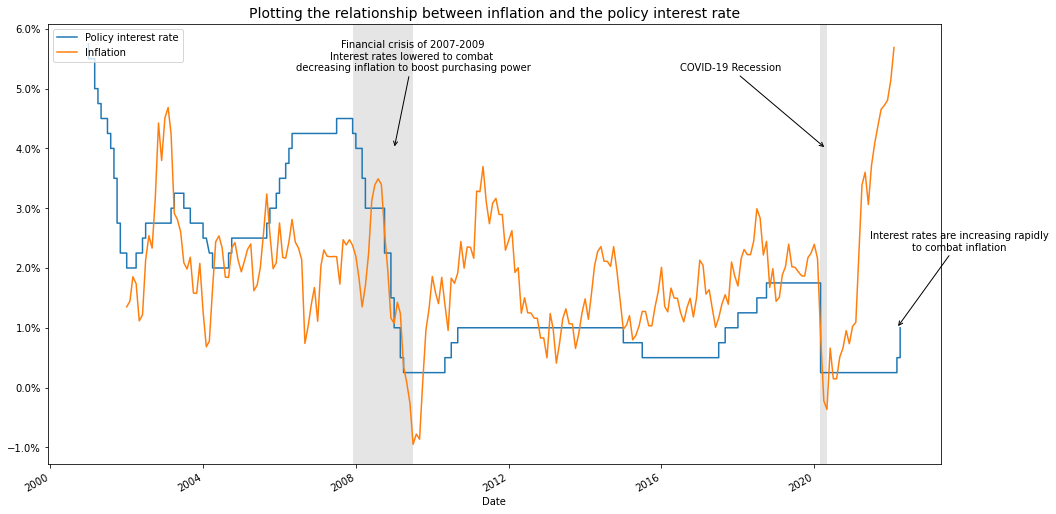

In [79]:
fig, ax = plt.subplots(figsize=(16,9))
interest_rate['Bank of Canada Target Overnight Rate'].plot(label='Policy interest rate')
inflation_pct.loc['All-items'].plot(label='Inflation')
plt.axvspan("2007-12-01", "2009-07-01", color='grey', alpha=0.2, lw=0)
ax.annotate("Financial crisis of 2007-2009\nInterest rates lowered to combat \ndecreasing inflation to boost purchasing power", xy=("2009-01-01", 4),
            xytext=("2009-07-01", 5.3),
            arrowprops=dict(arrowstyle="->"),ha='center')
plt.axvspan("2020-02-20", "2020-05-01", color='grey', alpha=0.2, lw=0)
ax.annotate("COVID-19 Recession", xy=("2020-04-20", 4), xytext=("2017-10-20", 5.3),
            arrowprops=dict(arrowstyle="->"),ha='center')
ax.annotate("Interest rates are increasing rapidly\nto combat inflation", xy=("2022-03-01", 1), xytext=("2023-10-20", 2.3),
            arrowprops=dict(arrowstyle="->"),ha='center')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc='upper left')
plt.title('Plotting the relationship between inflation and the policy interest rate',fontsize=14)
plt.show()


### Impact on investments
Another large implication with increasing inflation is the impact it has on investments. In reality, if you just hold your money in a bank account without any interest, your purchasing power is declining with the rate of inflation. Thus it is very common to place your money in the stock market and hope to make a return on your investment. Throughout history, the stock market has yielded yearly returns at approximately 7% which is viewed as a good investment. But now with inflation running close to six percent, if the market goes up by seven percent, that only yields a net percent on the initial investment in terms of buying power. This is generally negative as it forces people to make more risky investments in order to 

In the chart below, the yearly returns for the past 20 years is plotted together with the average for those years. To portray the effect that high inflation can have on the returns, the chart can be dynamically updated with the slider adjusting the inflation percentage.

In [80]:
stocks = pd.read_csv('Stock_returns.csv')
stocks['Date']=pd.to_datetime(stocks['Date'])


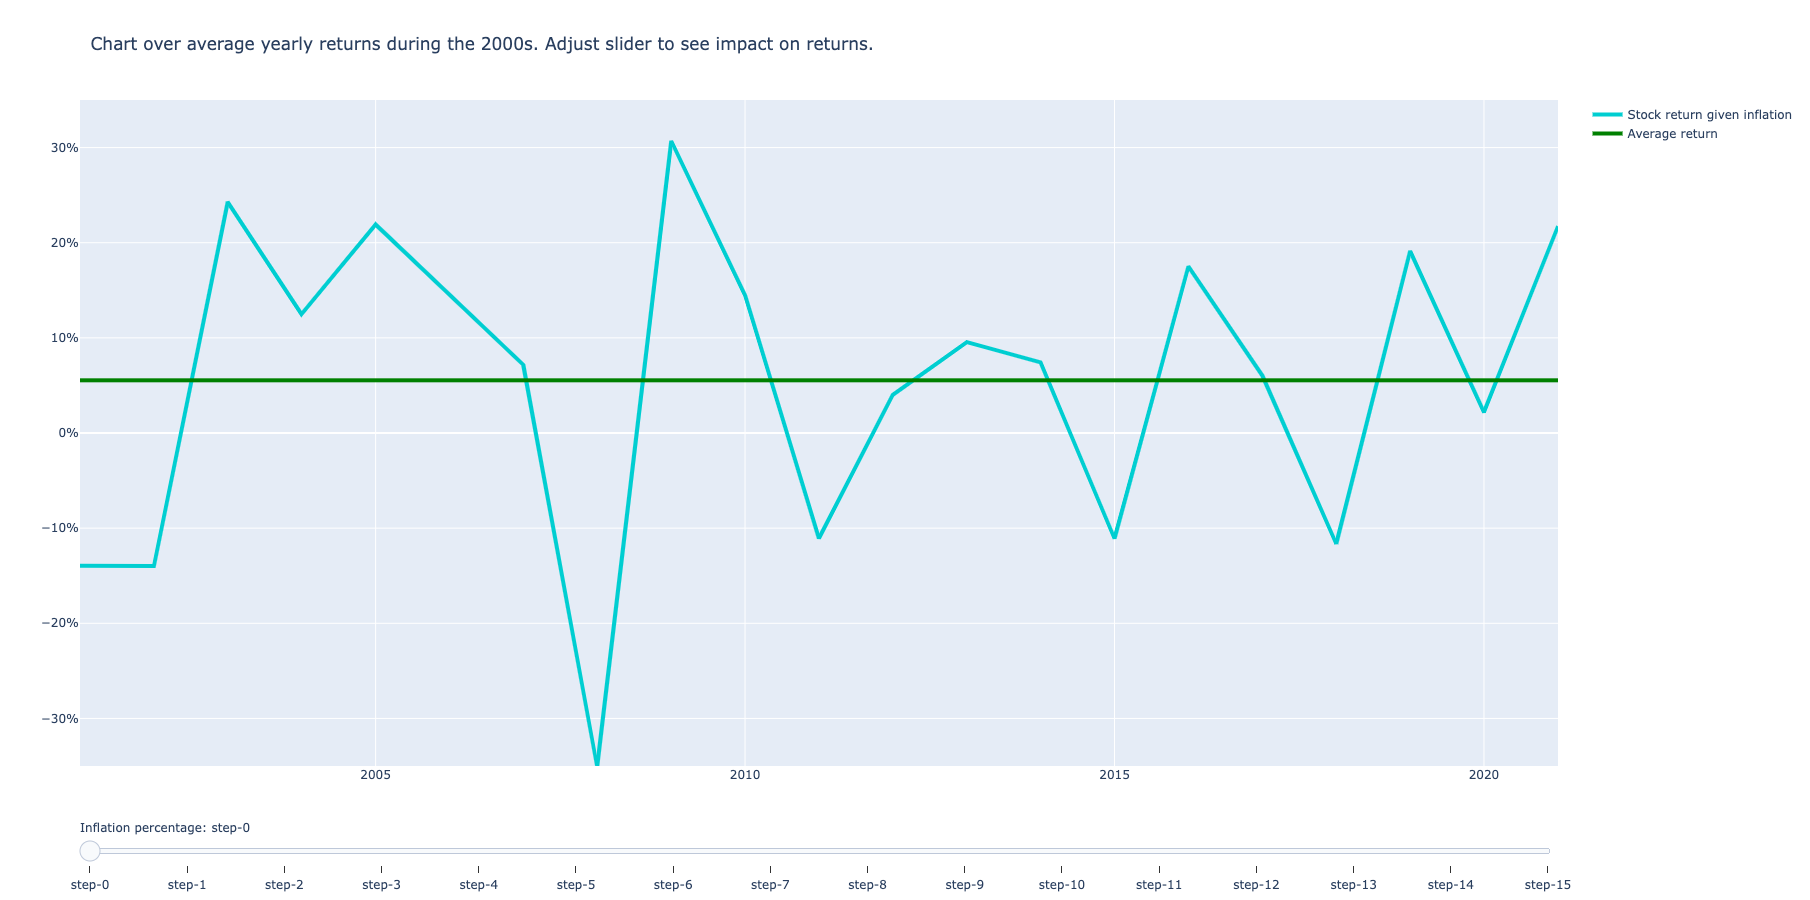

In [84]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()

for percent in range(0,16):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=4),
            name="Stock return given inflation",
            x=stocks['Date'],
            y=(stocks['Yearly Change']-percent)/100))
    fig.add_trace(
    go.Scatter(
        visible=False,
        line=dict(color="green", width=4),
        name="Average return",
        x=stocks['Date'],
        y=len(stocks['Date'])*[(stocks['Yearly Change'].mean()-percent)/100]))

fig.data[0].visible = True
fig.data[1].visible = True

steps = []
for i in range(0,len(fig.data),2):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to inflation: " + str(round(i/2))+'%'}] # layout attribute
        , name ='inf'
    )
    step["args"][0]["visible"][i] = True
    step["args"][0]["visible"][i+1] = True 
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Inflation percentage: "},
    pad={"t": 50},
    steps=steps
)]



fig.update_layout(
    sliders=sliders
)

fig.update_layout(
    autosize=False,
    width=1400,
    height=900,title=f'Chart over average yearly returns during the 2000s. Adjust slider to see impact on returns.')
fig.update_layout(yaxis_tickformat = '.00%')
fig.update_yaxes(range=[-.35, .35])
fig.show()

### Conclusion
In this project we have analyzed some of the causes to the rising inflation and the means to limit it. Furthermore we have discussed some implications of it such as the impact it has on investments. Right now, high inflation is a problem throughout the world after two years of the COVID-19 pandemic and the rising problems with the war in Ukraine, as seen in the graph below. It would be interesting to revisit this project in a years time to analyze the measures that was taken during this time and the effect that they had. From that data we could then move forward to model the most efficient strategy in fighting inflation.

In [184]:
world_inflation = pd.read_csv('world_inflation.csv')
l = []
for c in world_inflation['Country']:
    try:
        l.append(pycountry.countries.get(name=c).alpha_3)
    except:
        l.append("")
world_inflation['codes'] = l

world_inflation = world_inflation.loc[world_inflation['Inflation'] < 50] # Removed all countries with inflation > 50 % since it messed up the scale.

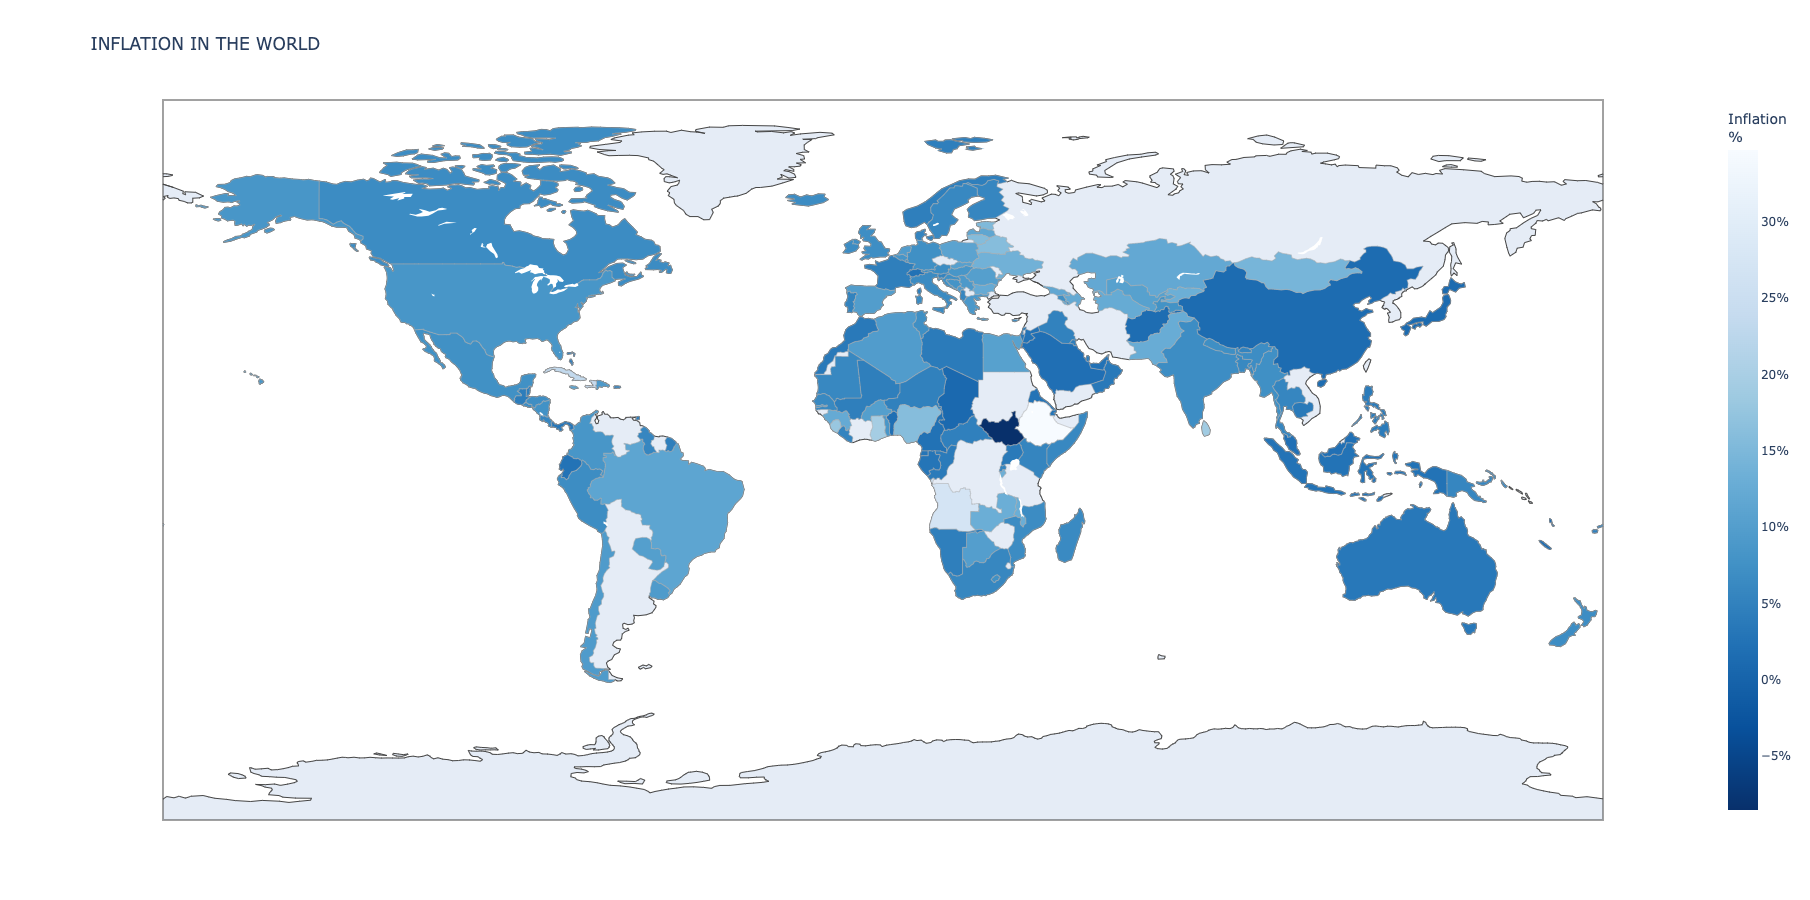

In [186]:
fig = go.Figure(data=go.Choropleth(
    locations = world_inflation['codes'],
    z = world_inflation['Inflation'],
    text = world_inflation['Country'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = '%',
    colorbar_title = 'Inflation<br>%'
))
fig.update_layout(
title='INFLATION IN THE WORLD',
autosize=False,
    width=1400,
    height=900,)
fig.show()